In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/3809839476.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing a initial look at data

In [3]:
df = pd.read_csv('/Users/joeyposillico/Desktop/project 2/data 2.csv')
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
print(df.shape)
print(df.describe())

(128061, 9)
                 Age      Education  Introversion Score  Sensing Score  \
count  128061.000000  128061.000000       128061.000000  128061.000000   
mean       26.349091       0.411156            4.996387       5.081893   
std         4.908022       0.492045            2.888636       1.183236   
min        18.000000       0.000000            0.000040       0.000000   
25%        23.000000       0.000000            2.490710       4.315659   
50%        25.000000       0.000000            4.993640       5.124169   
75%        29.000000       1.000000            7.500170       5.892288   
max        57.000000       1.000000            9.999990       9.788815   

       Thinking Score  Judging Score  
count   128061.000000  128061.000000  
mean         4.988040       4.578293  
std          2.886018       1.391582  
min          0.000050       0.000000  
25%          2.488630       3.709353  
50%          4.984180       4.690653  
75%          7.492550       5.561229  
max      

- getting an idea of the data, I see there are 128061 rows and 9 different columns

In [5]:
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

### Checking if any null values that will need to be dealt with

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

- no missing values!

### Creating visuals to assess the distribution of the data in each column

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/1075744267.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], palette='dark')
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/1075744267.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[0, 1], palette='dark')
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/1075744267.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Education'], bins=10, kde=True, ax=axes[1, 0], palette='dark')
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/1075744267.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Introversi

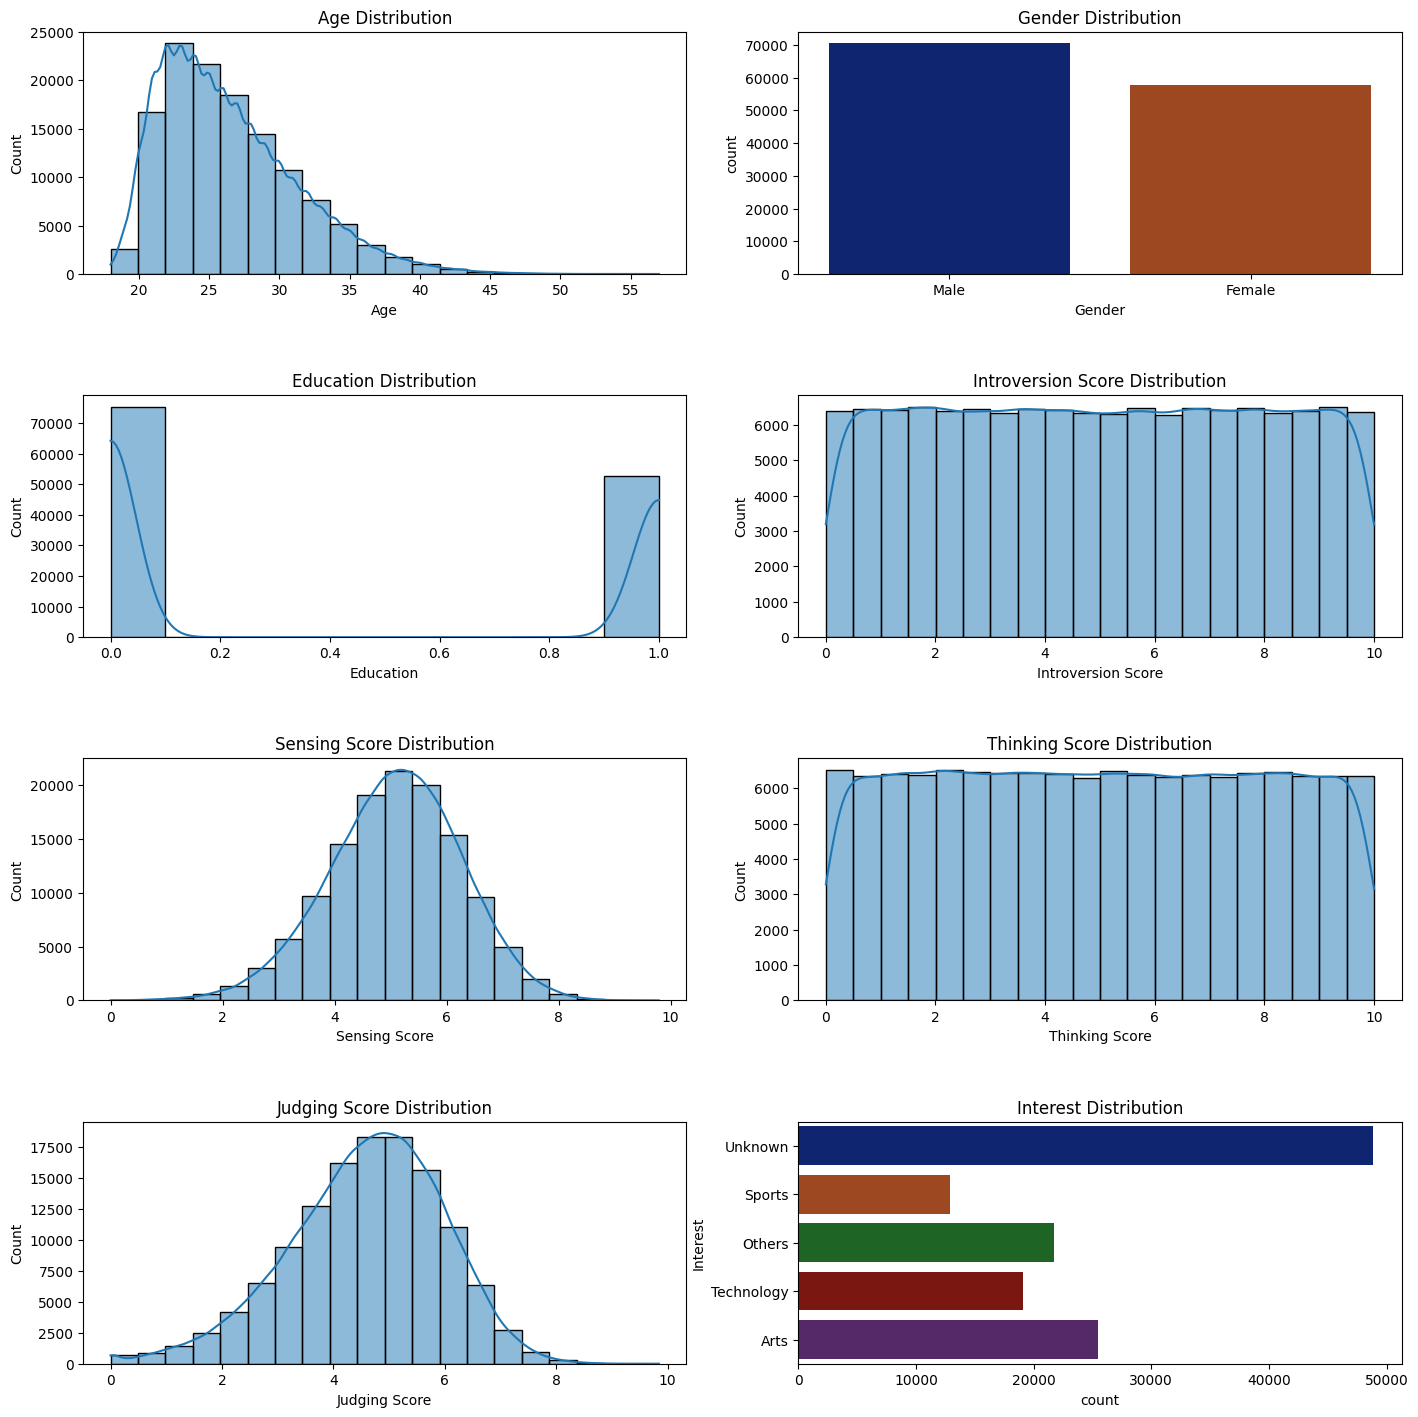

In [7]:
# Makes it so that there are 4 rows and 2 columns when displaying the visuals 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Age distribution using histplot
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], palette='dark')
axes[0, 0].set_title('Age Distribution')

# Gender distribution using countplot (countplot because its yes/no values)
sns.countplot(x='Gender', data=df, ax=axes[0, 1], palette='dark')
axes[0, 1].set_title('Gender Distribution')

# Education distribution histplot
sns.histplot(df['Education'], bins=10, kde=True, ax=axes[1, 0], palette='dark')
axes[1, 0].set_title('Education Distribution')

# Introversion Score histplot
sns.histplot(df['Introversion Score'], bins=20, kde=True, ax=axes[1, 1], palette='dark')
axes[1, 1].set_title('Introversion Score Distribution')

# Sensing Score histplot
sns.histplot(df['Sensing Score'], bins=20, kde=True, ax=axes[2, 0], palette='dark')
axes[2, 0].set_title('Sensing Score Distribution')

# Thinking Score histplot
sns.histplot(df['Thinking Score'], bins=20, kde=True, ax=axes[2, 1], palette='dark')
axes[2, 1].set_title('Thinking Score Distribution')

# Judging Score histplot
sns.histplot(df['Judging Score'], bins=20, kde=True, ax=axes[3, 0], palette='dark')
axes[3, 0].set_title('Judging Score Distribution')

# Interest countplot (because they are different categorical values)
sns.countplot(y='Interest', data=df, ax=axes[3, 1], palette='dark')
axes[3, 1].set_title('Interest Distribution')

# Adjusts the layout and shows the plots
plt.subplots_adjust(hspace=0.5)
plt.show()


- here we see that most columns are actuall pretty well distributed, although it is noted that the Age column is leftward skewed which will need to be discussed. Another possible important takeway is that the interests field has significantly more unkown entries than the specified interests. 

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_34572/4216180105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Personality', data=df, palette='dark')


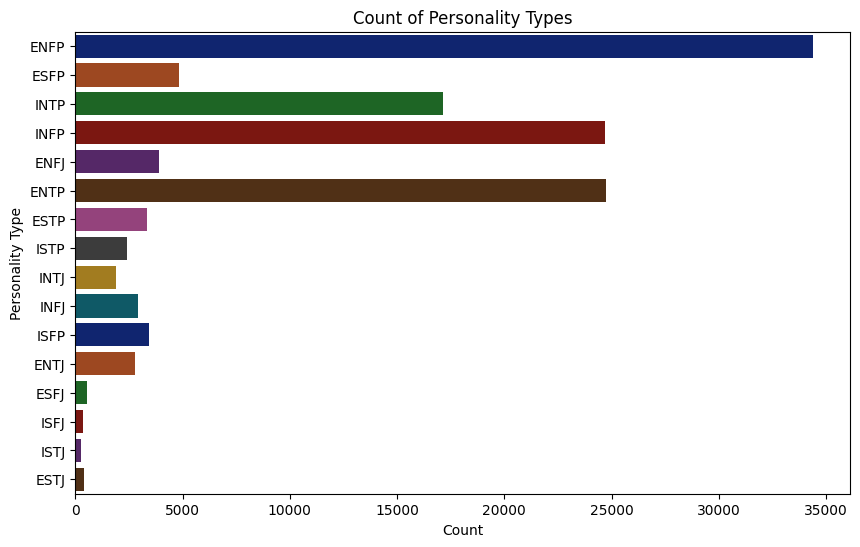

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Personality', data=df, palette='dark')
plt.title('Count of Personality Types')
plt.xlabel('Count')
plt.ylabel('Personality Type')
plt.show()

- did the personalities counts seperatley because this will be our target. This shows that some personality types appear to be significantly more common than others.

### Preprocessing
- Not much manipulation needs to be performed on this data luckily, the main thing will be to create numeric values for the categorical fields which are Gender and Interest

In [9]:
#Convert categorical variables (excluding 'Personality') to dummy variables, dropping 'Personality' because this is our target, only getting dummies for gender and interest
df_dummies = pd.get_dummies(df.drop(columns=['Personality']), columns=['Gender', 'Interest'], drop_first=True) 
df_dummies.head()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Gender_Male,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,0,9.47080,7.141434,6.03696,4.360278,True,False,False,False,True
1,27.0,0,5.85392,6.160195,0.80552,4.221421,False,False,True,False,False
2,21.0,0,7.08615,3.388433,2.66188,5.127320,False,False,False,False,True
3,28.0,0,2.01892,4.823624,7.30625,5.986550,True,True,False,False,False
4,36.0,1,9.91703,4.755080,5.31469,4.677213,False,False,False,True,False


In [11]:
df_dummies.shape

(128061, 11)

- here we can see that this split our categorical values into boolean values that can be with our classification model

In [9]:
# seperating the target and predictor variables into X and y
y = df['Personality'] #this is our target (what we are predicting)
X = df_dummies #these are the predictor variables

- note that for the X since I seperated y from the dummies DF earlier, the entire DF is comprised of just our predictors so we can just set X equal to the entire DF.

### Creating the Random Forest Model
- decided to choose random forest model for this classification problem, will explain the reasoning behind this in the actual written portion of this project.

In [10]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- this step splits our data into training and testing partitions. 
- test_size = 0.2 indicates that this will be using 20% of the data for testing and 80% for training
- random_state just indicates that I am using the random state 42 at the moment so the data used in each prediction will not be randomized, if I were to delete the random_state it would by default just randomly choose data each time but since its set it will always choose the same portion to run the test on. I am leaving it like this for now because I mostly just want to get an idea of how accurate the model is and I don't want to get confused with multiple different accuracy scores based on different portions of the data being used. If the model seems accurate enough I can run this without the random state. 

In [11]:
#creating the random forest model
model = RandomForestClassifier(random_state=42) #stores the model
model.fit(X_train, y_train) #fits the model to the training data that was created above

RandomForestClassifier(random_state=42)

### Evaluating the model

In [12]:
#Model Evaluation
y_pred = model.predict(X_test) #predicts the test data
print(classification_report(y_test, y_pred)) #generates the classification report

              precision    recall  f1-score   support

        ENFJ       0.93      0.92      0.92       777
        ENFP       0.92      0.93      0.92      6881
        ENTJ       0.92      0.90      0.91       557
        ENTP       0.92      0.93      0.93      4944
        ESFJ       0.78      0.81      0.80       111
        ESFP       0.83      0.81      0.82       966
        ESTJ       0.80      0.77      0.78        78
        ESTP       0.86      0.82      0.84       667
        INFJ       0.89      0.92      0.90       584
        INFP       0.90      0.90      0.90      4942
        INTJ       0.88      0.89      0.88       384
        INTP       0.90      0.88      0.89      3427
        ISFJ       0.86      0.69      0.77        74
        ISFP       0.80      0.84      0.82       691
        ISTJ       0.82      0.63      0.72        52
        ISTP       0.80      0.77      0.79       478

    accuracy                           0.90     25613
   macro avg       0.86   

- This shows that the overal precesion, recall, and f1-score of this model is .90 or 90% which is good! This breaks down these statistic when pertaining to each personality type, for instance the model was most precise at predicting ENFJ personality types (93%) and had the worst precision for ESFJ personality types (78% not too bad) this could potentially be explained due to have much less data for ESFJ personality types.

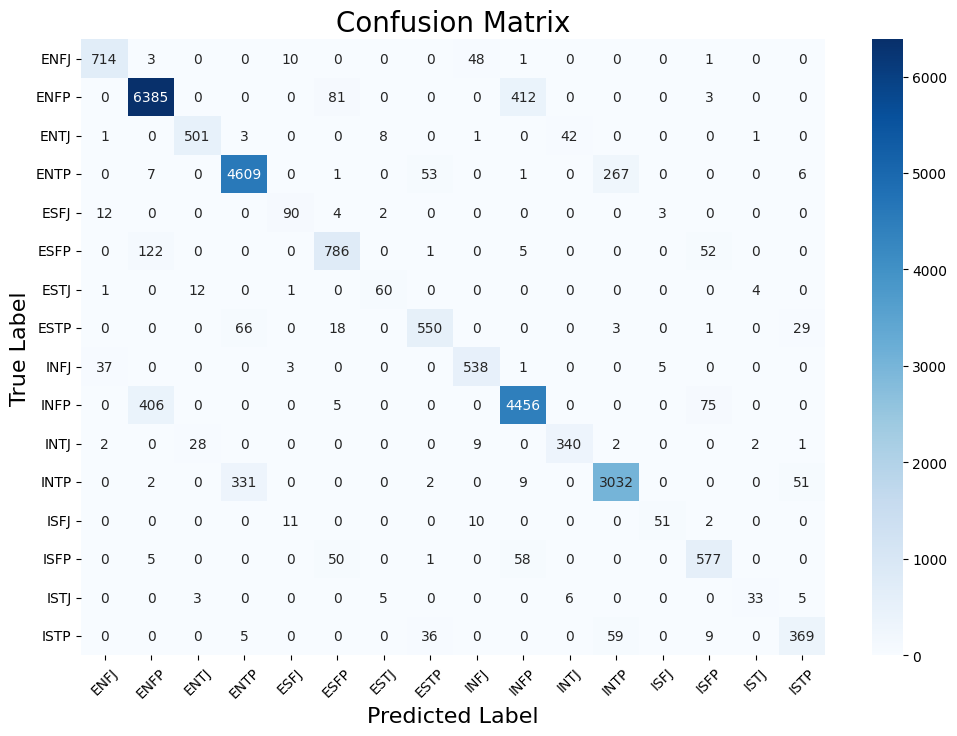

In [13]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creates a heatmap for the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- confusion matrix for the model, I will use this in the final written portion of this project and will explain the significance/meaning of this.

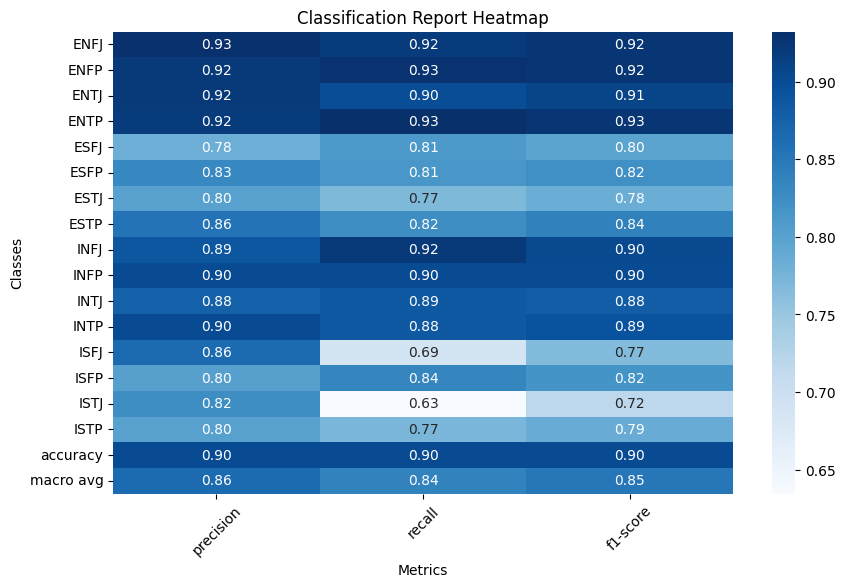

In [14]:
# Generates classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose() #transpose just switches the rows and columns to make it easier to read
report_df = report_df.iloc[:-1, :-1]  # Exclude 'support' and 'accuracy'

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

- A visual used to represent the statistics that can be used in the written portion

### Feature Importance
- here I am going to check which features impact this model the most in order to form a takeaway from this model

In [15]:
# Extract feature importances
importances = model.feature_importances_

# Creating a DataFrame for the feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorts the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df) #prints the feature importances

                Feature  Importance
4        Thinking Score    0.317492
2    Introversion Score    0.305389
5         Judging Score    0.118333
3         Sensing Score    0.113478
0                   Age    0.054096
1             Education    0.036454
6           Gender_Male    0.021780
8       Interest_Sports    0.010423
10     Interest_Unknown    0.008164
7       Interest_Others    0.007227
9   Interest_Technology    0.007164


/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_31082/4157476176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df,palette='dark')


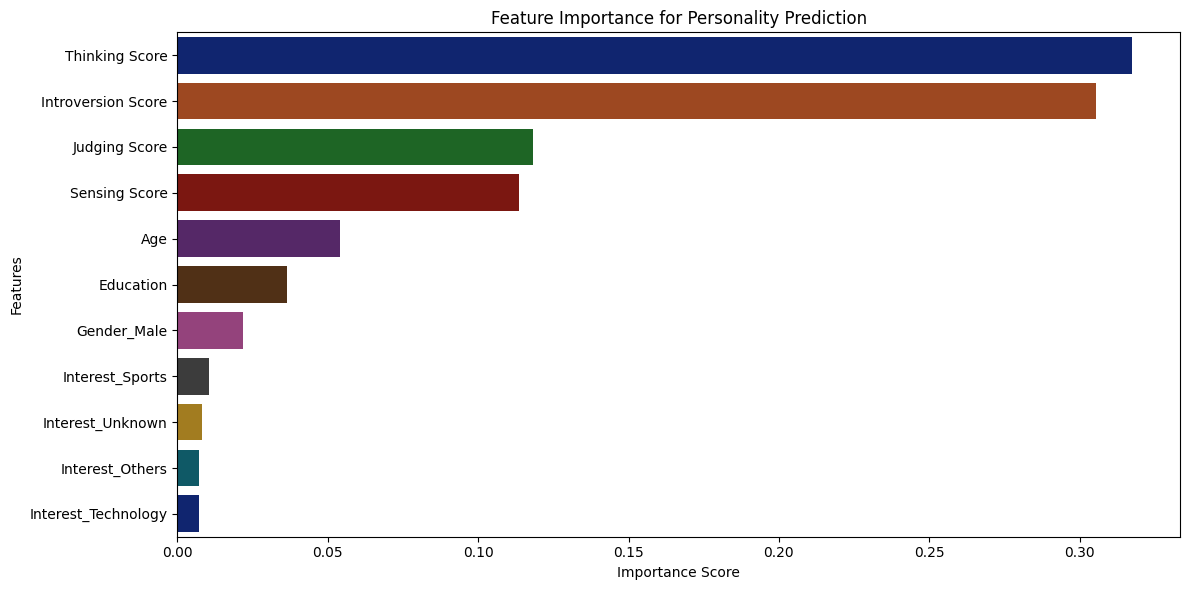

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df,palette='dark')
plt.title('Feature Importance for Personality Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

- just a visual for feature importance that will be used in the written portion of this project to showcase the takeaway from this project. 

### Baseline Model
- Creating a baseline model to compare our Random Forest Model with
- could have done this first but the outcome/interpretation will be the same regardless of when this step was taken

In [17]:
from sklearn.dummy import DummyClassifier
# Create the baseline model
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)

# Fit the model on the training data
baseline_model.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print(classification_report(y_test, y_pred_baseline))

Baseline Model Performance:
Accuracy: 0.27


/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       777
        ENFP       0.27      1.00      0.42      6881
        ENTJ       0.00      0.00      0.00       557
        ENTP       0.00      0.00      0.00      4944
        ESFJ       0.00      0.00      0.00       111
        ESFP       0.00      0.00      0.00       966
        ESTJ       0.00      0.00      0.00        78
        ESTP       0.00      0.00      0.00       667
        INFJ       0.00      0.00      0.00       584
        INFP       0.00      0.00      0.00      4942
        INTJ       0.00      0.00      0.00       384
        INTP       0.00      0.00      0.00      3427
        ISFJ       0.00      0.00      0.00        74
        ISFP       0.00      0.00      0.00       691
        ISTJ       0.00      0.00      0.00        52
        ISTP       0.00      0.00      0.00       478

    accuracy                           0.27     25613
   macro avg       0.02   

/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- baseline model has a signifcantly lower accuracy score (27%) than our Random Forest model that we created (90%). The baseline model only chooses the most frequently occuring class which is why ENFP is the only row with actual numbers other than 0 (since its the most frequent), this emphasizes the importance of more advanced models like random forest as it shows that the baseline model is not even remotely close to as accurate as the Random Forest Model in terms of making personality type predictions based on the given attributes. 

#### visualizing the baseline
- repeating pretty much the same steps that were done on the actual random forest model just to visualize the baseline

/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/joeyposillico/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

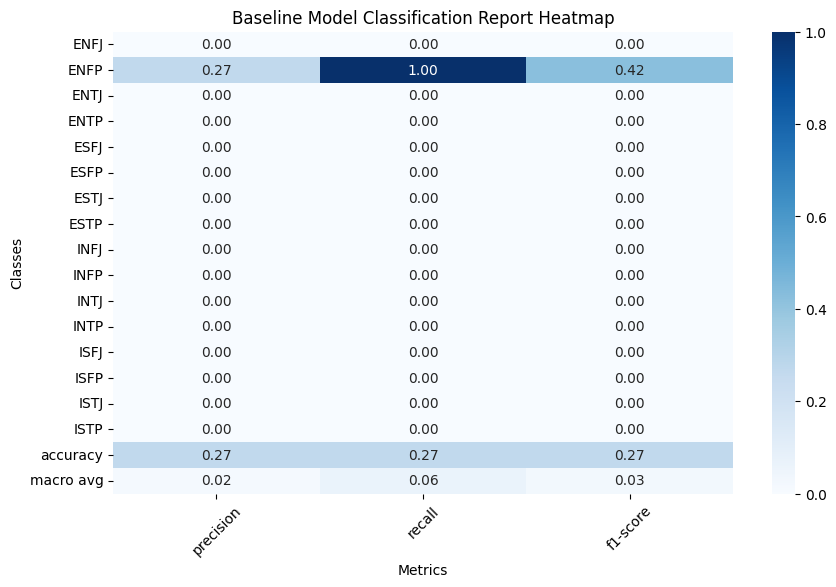

In [19]:
# Generate classification report for the baseline model
report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)

# Prepare data for heatmap
report_df_baseline = pd.DataFrame(report_baseline).transpose() 
report_df_baseline = report_df_baseline.iloc[:-1, :-1]  # Exclude 'support' and 'accuracy'

# Plotting the heatmap for baseline model
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_baseline[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Baseline Model Classification Report Heatmap')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

- Creating a visualization for this simarlily to how I created one for the Random Forest Model to use as a comparison in the written portion of this project.